In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Github/ERA-v1/S6

/content/drive/MyDrive/Github/ERA-v1/S6


In [ ]:
%ls

'model copy.py'   model.py   __pycache__/   S6.ipynb   utils.py


In [ ]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 327 bytes | 6.00 KiB/s, done.
From https://github.com/Madhur-1/ERA-v1
   cc1252f..ee6c718  master     -> origin/master
Updating cc1252f..ee6c718
Fast-forward
 S6/model.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


CODE BLOCK: 1

In [ ]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net
from utils import train, test
import torch.nn.functional as F

CODE BLOCK: 2

In [ ]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 32, 24, 24]           4,640
              ReLU-5           [-1, 32, 24, 24]               0
       BatchNorm2d-6           [-1, 32, 24, 24]              64
            Conv2d-7           [-1, 32, 22, 22]           9,248
              ReLU-8           [-1, 32, 22, 22]               0
       BatchNorm2d-9           [-1, 32, 22, 22]              64
           Conv2d-10            [-1, 8, 11, 11]             264
           Conv2d-11             [-1, 16, 9, 9]           1,168
             ReLU-12             [-1, 16, 9, 9]               0
    

CODE BLOCK: 3

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [ ]:
batch_size = 4092

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

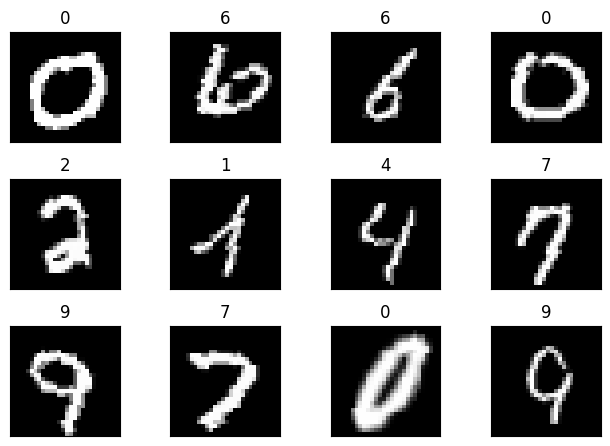

In [ ]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1


Train: Loss=1.0686 Batch_id=14 Accuracy=50.92: 100%|██████████| 15/15 [00:32<00:00,  2.15s/it]


Test set: Average loss: 2.0865, Accuracy: 2131/10000 (21.31%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2


Train: Loss=0.3278 Batch_id=14 Accuracy=88.05: 100%|██████████| 15/15 [00:22<00:00,  1.50s/it]


Test set: Average loss: 0.5221, Accuracy: 8557/10000 (85.57%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3


Train: Loss=0.1646 Batch_id=14 Accuracy=94.88: 100%|██████████| 15/15 [00:21<00:00,  1.43s/it]


Test set: Average loss: 0.1893, Accuracy: 9514/10000 (95.14%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4


Train: Loss=0.1250 Batch_id=14 Accuracy=96.71: 100%|██████████| 15/15 [00:24<00:00,  1.61s/it]


Test set: Average loss: 0.0712, Accuracy: 9834/10000 (98.34%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 5


Train: Loss=0.1007 Batch_id=14 Accuracy=97.41: 100%|██████████| 15/15 [00:24<00:00,  1.63s/it]


Test set: Average loss: 0.0578, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 6


Train: Loss=0.0867 Batch_id=14 Accuracy=97.81: 100%|██████████| 15/15 [00:23<00:00,  1.54s/it]


Test set: Average loss: 0.0538, Accuracy: 9876/10000 (98.76%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 7


Train: Loss=0.0655 Batch_id=14 Accuracy=98.06: 100%|██████████| 15/15 [00:22<00:00,  1.53s/it]


Test set: Average loss: 0.0474, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 8


Train: Loss=0.0688 Batch_id=14 Accuracy=98.23: 100%|██████████| 15/15 [00:21<00:00,  1.44s/it]


Test set: Average loss: 0.0504, Accuracy: 9870/10000 (98.70%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 9


Train: Loss=0.0619 Batch_id=14 Accuracy=98.38: 100%|██████████| 15/15 [00:21<00:00,  1.41s/it]


Test set: Average loss: 0.0365, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 10


Train: Loss=0.0521 Batch_id=14 Accuracy=98.38: 100%|██████████| 15/15 [00:22<00:00,  1.51s/it]


Test set: Average loss: 0.0365, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 11


Train: Loss=0.0553 Batch_id=14 Accuracy=98.53: 100%|██████████| 15/15 [00:23<00:00,  1.54s/it]


Test set: Average loss: 0.0329, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 12


Train: Loss=0.0454 Batch_id=14 Accuracy=98.63: 100%|██████████| 15/15 [00:22<00:00,  1.51s/it]


Test set: Average loss: 0.0317, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 13


Train: Loss=0.0410 Batch_id=14 Accuracy=98.72: 100%|██████████| 15/15 [00:21<00:00,  1.41s/it]


Test set: Average loss: 0.0298, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 14


Train: Loss=0.0429 Batch_id=14 Accuracy=98.83: 100%|██████████| 15/15 [00:20<00:00,  1.40s/it]


Test set: Average loss: 0.0281, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 15


Train: Loss=0.0385 Batch_id=14 Accuracy=98.85: 100%|██████████| 15/15 [00:22<00:00,  1.51s/it]


Test set: Average loss: 0.0292, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 16


Train: Loss=0.0436 Batch_id=14 Accuracy=98.93: 100%|██████████| 15/15 [00:22<00:00,  1.48s/it]


Test set: Average loss: 0.0272, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 17


Train: Loss=0.0377 Batch_id=14 Accuracy=98.99: 100%|██████████| 15/15 [00:22<00:00,  1.49s/it]


Test set: Average loss: 0.0253, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 18


Train: Loss=0.0431 Batch_id=14 Accuracy=98.98: 100%|██████████| 15/15 [00:22<00:00,  1.49s/it]


Test set: Average loss: 0.0253, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 19


Train: Loss=0.0377 Batch_id=14 Accuracy=99.05: 100%|██████████| 15/15 [00:22<00:00,  1.49s/it]


Test set: Average loss: 0.0255, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 20


Train: Loss=0.0402 Batch_id=10 Accuracy=98.96:  67%|██████▋   | 10/15 [00:17<00:05,  1.19s/it]

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()

In [ ]:
!git add .

In [ ]:
!git commit -m changes

In [ ]:
!git push